# Mohamed Abdelaaty

## Research question/interests

The primary interest is in the effect of elevation on the frequency and severity of car accidents.

The secondary interest is in the effect of time and weather conditions on the frequency and severity of car accidents.

In [1]:
# Import useful libraries
import sys
sys.path.append('../util')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Data pipeline
from DataPipeline import DataPipeline
from OpenElevationsWrapper import OpenElevationsApi as ElevationsApi

sns.set_theme(style="ticks")

In [2]:
## Perform data wrangling
dp = DataPipeline('../data/raw/elevations.csv', '../data/raw/US_Accidents_Dec20_updated.csv', '../data/processed/data.csv')

h:\School\DATA 301\project-group53\notebooks\../util\DataPipeline.py:9: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  self._df = self.__read_and_process_dataset()


In [3]:
df = dp.df

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,166363.0,2.206963,0.700831,1.000000,2.000000,2.000000,2.000000,4.00000
Start_Lat,166363.0,37.907518,5.357386,24.574730,34.077366,38.197315,42.174674,48.99333
Start_Lng,166363.0,-100.613140,18.899620,-124.497567,-120.018409,-97.565530,-81.115175,-67.48413
End_Lat,166363.0,37.907458,5.357143,24.583640,34.077377,38.197315,42.173825,48.99333
End_Lng,166363.0,-100.612723,18.899272,-124.497478,-120.018409,-97.565530,-81.112400,-67.48413
Temperature(F),166363.0,61.419343,18.205895,-27.000000,50.000000,63.000000,75.000000,111.00000
Wind_Chill(F),166363.0,60.231628,20.215740,-48.500000,49.000000,63.000000,75.000000,111.00000
Humidity(%),166363.0,61.268052,23.931686,1.000000,43.000000,63.000000,82.000000,100.00000
Pressure(in),166363.0,29.162968,1.292989,20.130000,29.020000,29.630000,29.920000,31.01000
Visibility(mi),166363.0,9.179992,2.727079,0.000000,10.000000,10.000000,10.000000,100.00000


In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Description', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Elevation'],
      dtype='object')

## Research Question One
The following few cells will investigate and answer the first research question.

<AxesSubplot:xlabel='Count', ylabel='Elevation'>

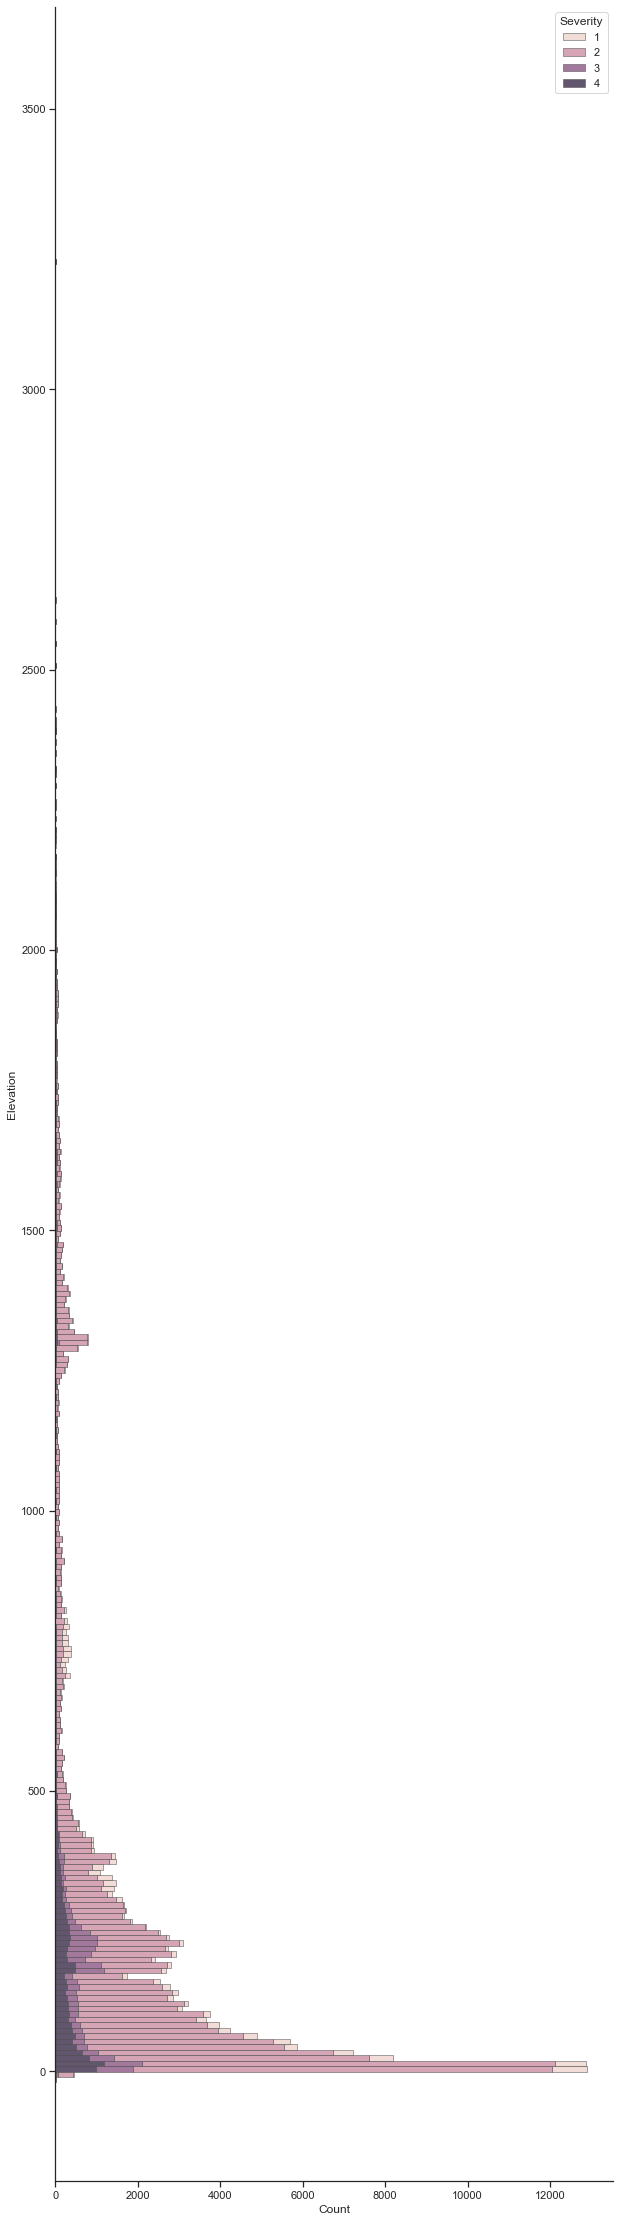

In [6]:
## Plot the count of accidents by elevation, grouped by severity
f, ax = plt.subplots(figsize=(10, 40))
sns.despine(f)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

sns.histplot(
    df, 
    y='Elevation', 
    hue='Severity',
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

## Observations for Research Question One

#### Part 1

We can see based on the accidents distribution, majority of car accidents occur below 500 meters above sea level. The frequency of car accidents significantly drops as the elevation increases. 

This can potentially be due to the different number of vehicle transportation in the different elevations. However, this data is not publicly available to perform such comparison.

#### Part 2

From the plot, it can be observed that majority of car accidents occur at a severity of two. We can see this trend holding true the higher the elevation. However, it can be observed that the average severity of the car accidents increases with altitude. This is due to the lower number of accidents at a severity of one. It can be safely concluded that the higher the elevation, the higher the likely severity of the accident.

## Research Question Two
The following few cells will investigate and answer the second research question.

<AxesSubplot:xlabel='count', ylabel='Weather_Condition'>

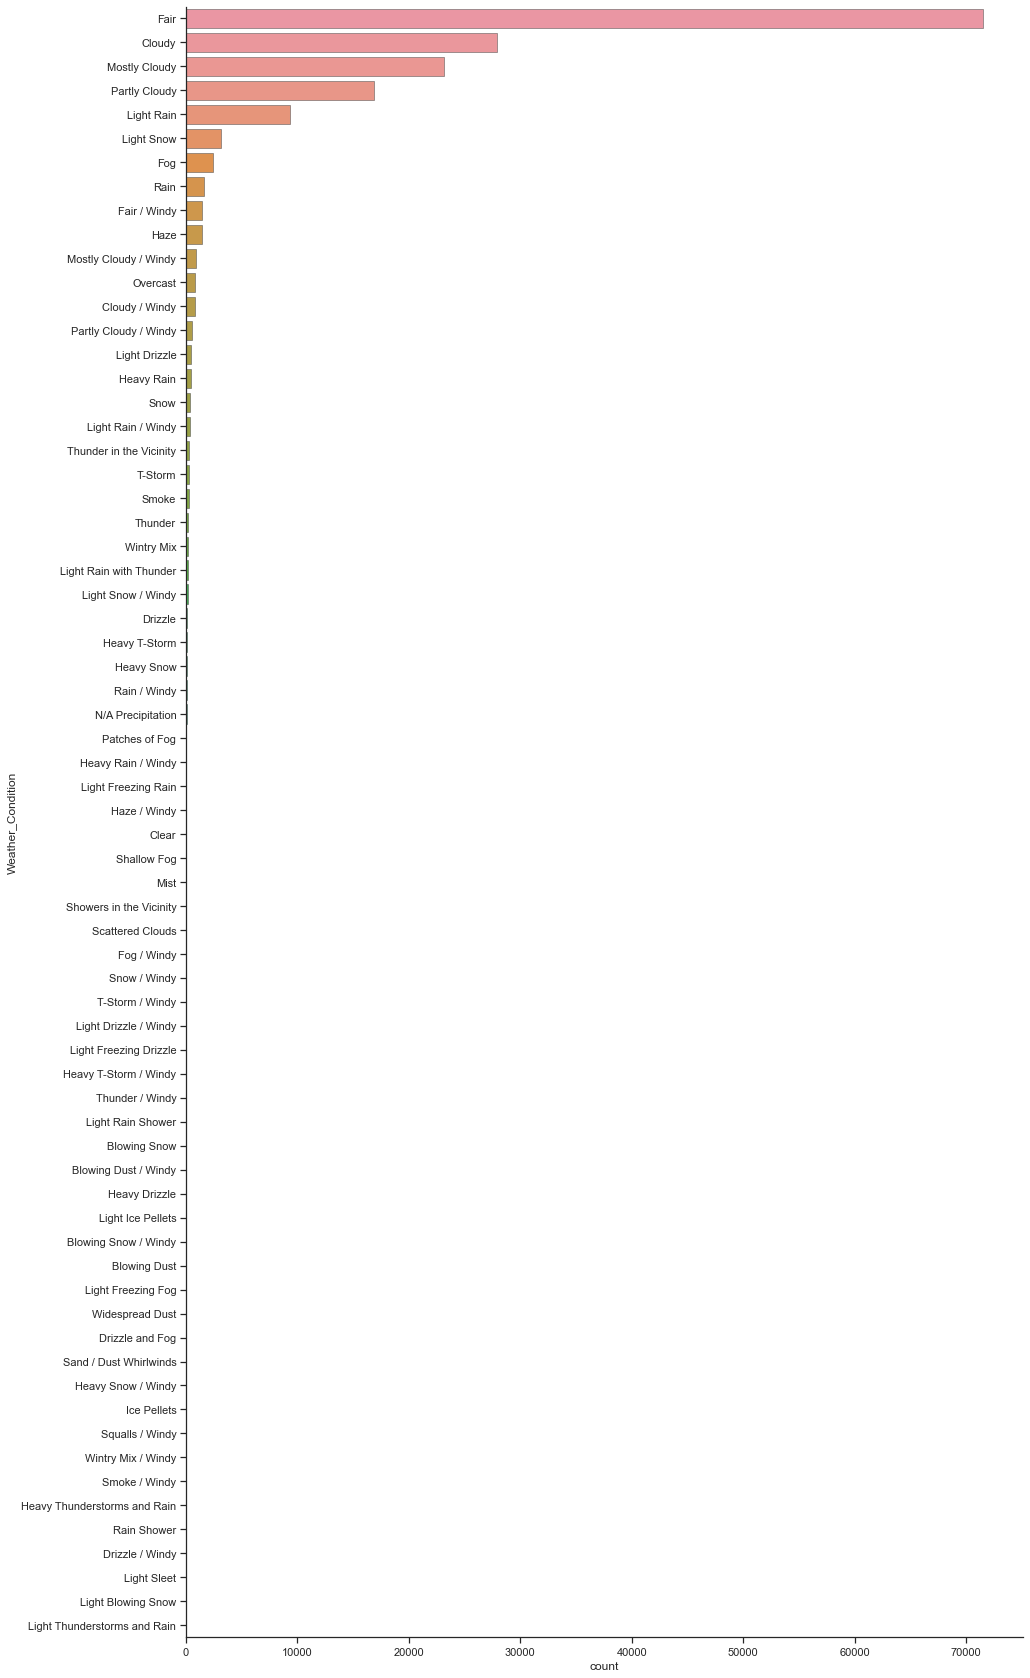

In [7]:
## Plot the count of accidents by Weather Conditions
f, ax = plt.subplots(figsize=(15, 30))
sns.despine(f)

sns.countplot(
    data=df, 
    y='Weather_Condition',
    edgecolor=".3",
    linewidth=.5,
    order=df['Weather_Condition'].value_counts().index,
)

In [8]:
# Get unique weather conditions values
weather_conditions = df['Weather_Condition'].unique()
# Calculate average severity for each weather condition
weather_conditions_avg_severity = df.groupby('Weather_Condition')['Severity'].mean()
weather_conditions_avg_severity.sort_values(inplace=True, ascending=False)

<AxesSubplot:xlabel='Severity'>

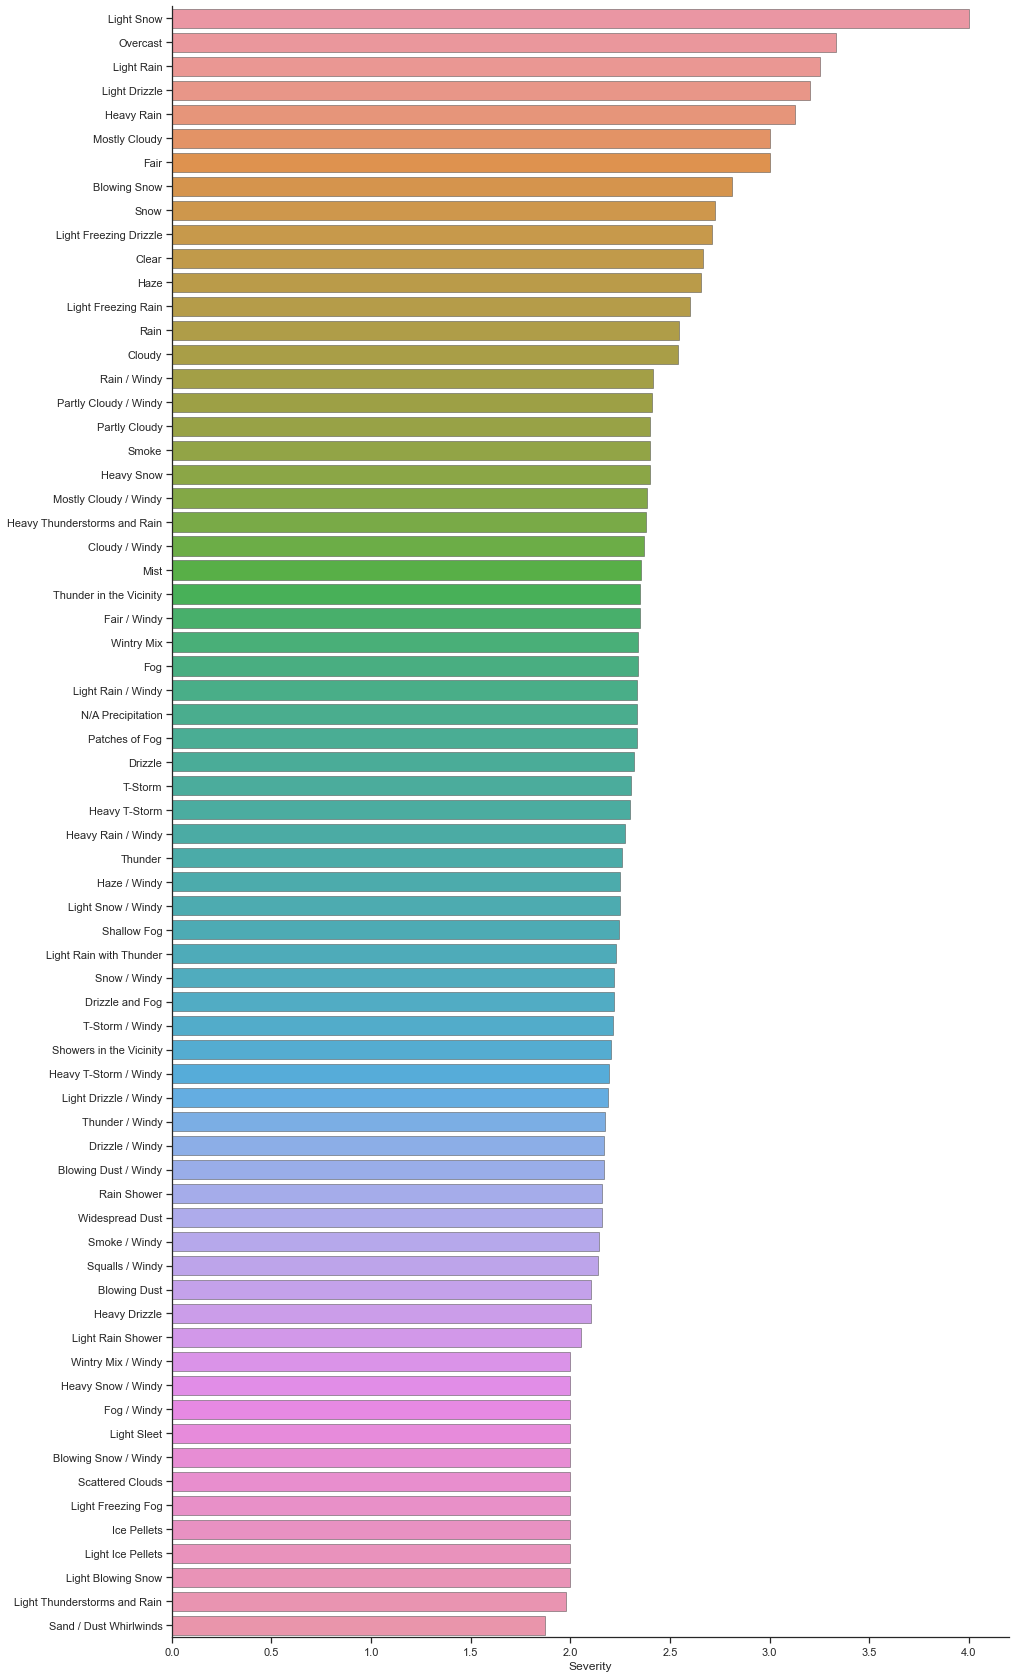

In [9]:
## Plot the average severity of car accidents by Weather Conditions
f, ax = plt.subplots(figsize=(15, 30))
sns.despine(f)

sns.barplot(
    y=weather_conditions,
    x=weather_conditions_avg_severity,
    edgecolor=".3",
    linewidth=.5,
)

## Observations for Research Question Two

#### Part 1

It can be observed that the frequency of car accidents drops as the weather conditions deteriorate. This trend can be observed as drivers tend to be more cautious in deteriorating weather conditions. Majority of the accidents occured in fair weather conditions. Showing that despite the conditions being adequate for safe driving, drivers tend to be more unsafe the higher their confidence in the weather conditions are.

It can also be observed that the average severity of the car accidents is the highest at light snow with an average severity of four. The lowest average accident severity occurs at a value slightly under two. This occurs in sand/dust whirlwinds. There is a distribution of car accidents severity accross the weather conditions. The weather conditions appear to get better and worse as the severity decreases, showing no real trend.

One visible observation is that the severity of the car accidents is extremely high for adequate driving conditions, namely Light Snow, Light Rain, Light Drizzle, Heavy Rain, Mostly Cloudy, and fair. It shows that car drivers tend to engage in dangeorous accidents in good conditions. Meanwhile, severe weather conditions sit betweent severity levels of two and 3. This can be observed in Fog, Cloudy, Mostly Cloudy, Heavy Thunder Storm, Heavy Rain and wind, and Heavy snow.

It does appear that drivers tend to be more careful around weather conditions that which they do not feel confident or are unable to fully control.

#### Part 2

The second part of the second research question can be best answered through the use of Tableau. The following graphs display the frequency of car accidents by time of day, and the severity of the car accidents based on the time of day.

![Frequency vs Time](./../images/freq_vs_time.png)


![Severity vs Time](./../images/sev_vs_time.png)


##### Observations

It can be observed that majority of car accidents occur during the rush hour period at the end of the day, between 13 and 17 hours. It can be further observed that the time of the day does not affect the severity of the car accidents. It can be concluded that the time of day affects the frequency of car accidents but not the severity. As you approach the rush hour, the likelihood of car accidents increases.


## Conclusion

It can be concluded and observed that the elevation affects both the frequency and the severity of car accidents. The lower the elevation, the higher the likelihood of car accidents. However, the higher the elevation, the higher the severity of the car accident. Moreover, it can be observed that the weather conditions greatly affect the severity and frequency of car accidents. Most car accidents occur in fair weather conditions. Furthermore, the likely severity of car accidents appears to occur in Light Snow weather conditions with an average severity of four. On the other hand, the time of day appears to affect the frequency of car accidents but not the severity of said accidents. It can be observed that the likelihood of a car accident increases around the rush hour period, between 13 and 17 hours. Meanwhile, the severity of the car accidents is unaffected by the time of day.


Please note that images fail to load when viewing from github. Cloning the repository and viewing the notebook in VSCode displays the images correctly.